<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/Modulo04/Sesion_6_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

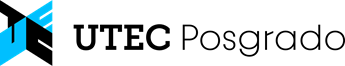


# **Módulo 3** - Sesión 5:  **Viualización de Datos Cuantitativos**
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.

**Nota:**
No olvides completar con tu análisis en las secciones: `La interpretación de tu gráfico anterior`.

## **Assignment:** Análisis Visual

El objetivo de este assignment es prácticar las técnicas de análisis exploratorio de datos para análisis univariado.

### **Paso 0:** Cargar librerías y seleccionar el conjunto de datos que se utilizará para este assignment.

In [2]:
#Importar Librerias
import pandas as pd
import seaborn as sns
import random

La función `cargarDatos()` escogerá al azar el conjunto de datos (dataset) con el que trabajarás en este assignment. Además la función ya te devuelve el dataset cargado en la variable `df`

In [3]:
def cargarDatos():
  datasetList = ["taxis", "flights", "planets"]
  rand_idx = random.randrange(len(datasetList))
  random_dataset = datasetList[rand_idx]
  print("El dataset que utilizarás es: ", random_dataset)
  df = sns.load_dataset(random_dataset)
  return df

In [48]:
#Asigna el dataset al azar y carga el dataset
df= cargarDatos()
df.head()

El dataset que utilizarás es:  taxis


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


### **Paso 1:** Descubre/Explora el conjunto de datos

In [49]:
#Resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

### **Ejercicio 1:** Método gráfico de un dato categórico ✋

Analiza de manera gráfica un dato categórico de tu dataset.

In [60]:
#Filtro para determinar los elementos de color "yellow" cuya pickup zone sera "Lenox Hill West" y el modo de pago sea de tipo "cash"
df_yellow = df[(df['color'] == 'yellow')&(df['pickup_zone']=='Lenox Hill West')&(df['payment']=='cash')]
df_yellow.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,yellow,green
483,2019-03-20 14:05:34,2019-03-20 14:12:28,2,1.02,6.5,0.0,0.0,9.8,yellow,cash,Lenox Hill West,Upper East Side North,Manhattan,Manhattan,yellow,yellow
631,2019-03-24 12:11:02,2019-03-24 12:12:54,1,0.34,3.5,0.0,0.0,6.8,yellow,cash,Lenox Hill West,Lenox Hill West,Manhattan,Manhattan,yellow,yellow
795,2019-03-09 20:37:37,2019-03-09 20:46:32,1,1.21,7.5,0.0,0.0,11.3,yellow,cash,Lenox Hill West,Lenox Hill West,Manhattan,Manhattan,yellow,yellow
812,2019-03-12 09:33:28,2019-03-12 09:36:38,1,0.48,4.0,0.0,0.0,7.3,yellow,cash,Lenox Hill West,Upper East Side North,Manhattan,Manhattan,yellow,yellow
1050,2019-03-11 23:09:09,2019-03-11 23:20:04,1,2.08,9.5,0.0,0.0,13.3,yellow,cash,Lenox Hill West,Murray Hill,Manhattan,Manhattan,yellow,yellow


**La interpretación de tu gráfico anterior:**

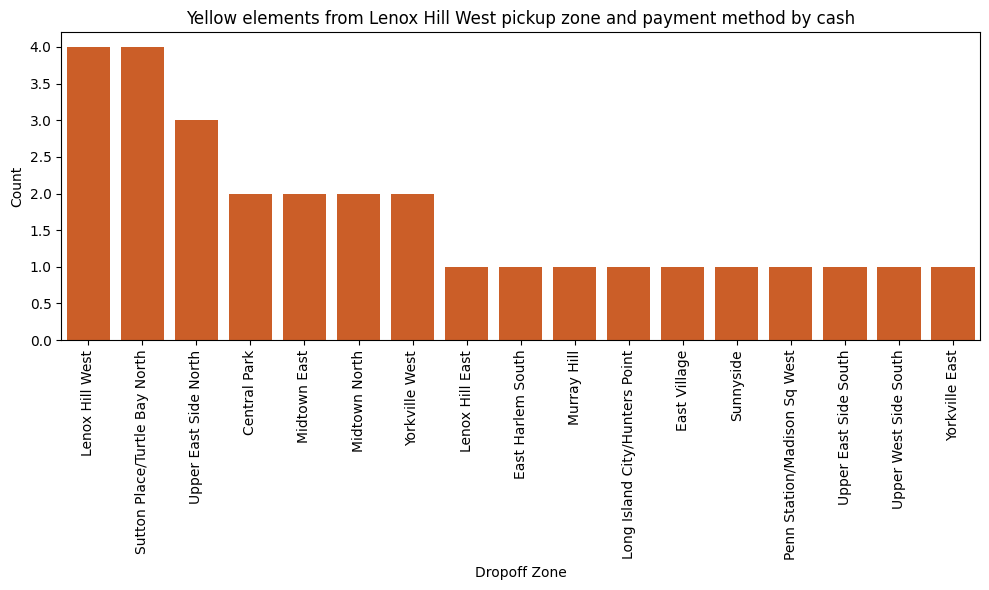

In [85]:
#de la data de los elementos cumplen con tener: color "yellow" cuya pickup zone sera "Lenox Hill West" y el modo de pago sea de tipo "cash". Se contara el numero de elementos segun la "dropoff_zone" y se mostrara de manera visuan en un grafico de barras
df_dropoff_counts = (
    df_yellow
    .groupby('dropoff_zone')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)
df_dropoff_counts = df_dropoff_counts.reset_index(drop=True)
df_dropoff_counts

# Crear el gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='dropoff_zone', y='count', data=df_dropoff_counts, color='#e6550d')

# Rotar las etiquetas del eje X 90 grados
plt.xticks(rotation=90)

plt.xlabel('Dropoff Zone')
plt.ylabel('Count')
plt.title('Yellow elements from Lenox Hill West pickup zone and payment method by cash')

plt.tight_layout()
plt.show()



### **Ejercicio 2:** Método gráfico de un dato cuantitativo ✋

Analiza de manera gráfica un dato cuantitativo de tu dataset.

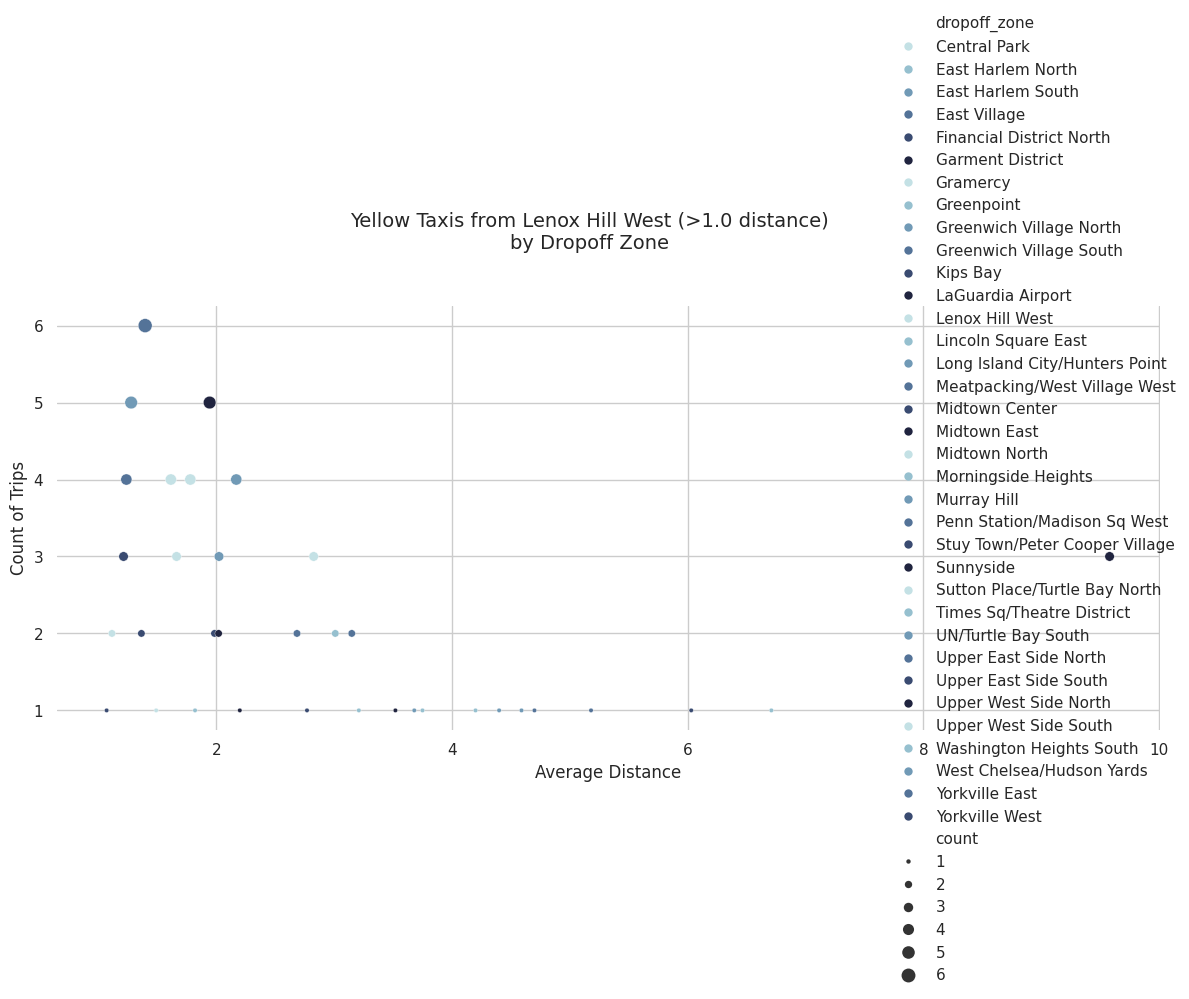

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrado
df_dist = df[
    (df['color'] == 'yellow') &
    (df['pickup_zone'] == 'Lenox Hill West') &
    (df['distance'] > 1.0)
]

# Agrupación
df_dist_counts = df_dist.groupby(['dropoff_zone']).agg(
    count=('distance', 'size'),
    avg_distance=('distance', 'mean')
).reset_index()

# Tema
sns.set_theme(style="whitegrid")

# Paleta discreta
palette = sns.cubehelix_palette(rot=-.2)

# Gráfico relplot
g = sns.relplot(
    data=df_dist_counts,
    x="avg_distance",
    y="count",
    hue="dropoff_zone",
    size="count",
    sizes=(10, 100),  # Reduje tamaño máximo para evitar burbujas gigantes
    palette=palette,
    height=6,
    aspect=1.5  # Hace la figura más ancha para dar espacio
)

# Grillas finas
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Ejes y título
g.set_axis_labels("Average Distance", "Count of Trips")
g.fig.suptitle(
    "Yellow Taxis from Lenox Hill West (>1.0 distance)\nby Dropoff Zone",
    fontsize=14
)

# Rotar y ajustar etiquetas si corresponde
# Si 'dropoff_zone' es el eje X, no aplica aquí porque X es 'avg_distance'
# Pero si quieres etiquetar puntos, usa 'annotate' o 'text'

# Ajuste de márgenes automáticos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título

plt.show()


**La interpretación de tu gráfico anterior:** ------


### **Ejercicio 3**: Método gráfico multivariado para datos cuantitativos ✋


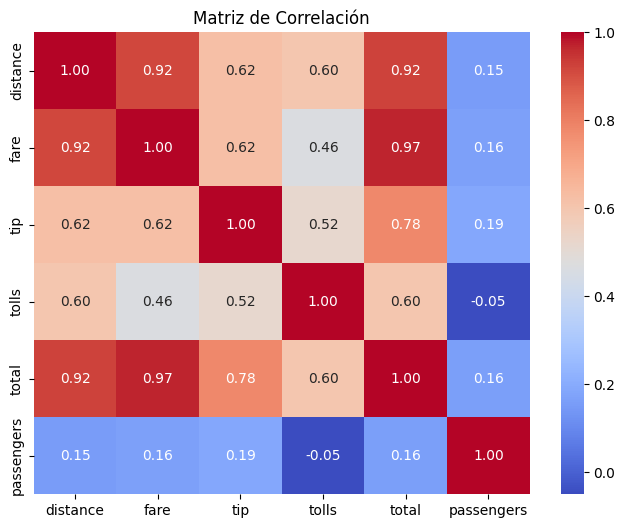

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Solo cuantitativas
cols = ['distance', 'fare', 'tip', 'tolls', 'total', 'passengers']

# Calcula matriz de correlación
corr = df_dist[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()



**La interpretación de tu gráfico anterior:** ------


##A partir del grafico se puede interpretar lo siguiente:
### - La distancia recorrida tiene una correlacion positiva con las propinas (tip) y la tarifa (fare)
### - la propina tiene una correlacion positiva con la tarifa
### - la cantidad de peajes tiene una correlacion negativa con la cantidad de pasageros
### - La catidad de peajes tiene una correlacion positiva con la distancia.